Vecinos próximos para clasificación
===

* 17:04 min | Ultima modificación: Abril 14, 2021 | [YouTube](https://youtu.be/Rzh_3Z_Rg7I)

La clase a la que pertenece un patrón o instancia puede ser asignado mediante similitud (si todos los puntos cercanos son azules, lo más probable es que el punto actual sea azul). Este es el fundamento de la metodología de vecinos próximos o vecinos más cercanos. En esta lección, se presenta un ejemplo sencillo que pemite explicar su funcionamiento interno, y, posteriormente, se ejemplifica su aplicación usando scikit-learn.

## Descripción del problema

Se desea determinar a cuál clase ($A$, $B$ o $C$) pertenece un elemento, a partir de resultados previamente recolectados. Para ello, se tiene una muestra de 15 ejemplos para los cuales se han medido sus características $x_1$ y $x_2$ y su respectiva clase.

    #     x1      x2   Clase
    ------------------------
     1  10.67   14.70    A
     2   9.74   13.79    A 
     3  10.23   14.30    A
     4  11.17   15.53    A
     5  10.41   15.08    A
     6  10.87    6.81    A
     7  11.95    6.05    B
     8  12.77    7.97    B
     9  14.42    9.25    B
    10  13.25    8.03    B
    11  13.27   13.92    C
    12  14.40   16.58    C
    13  14.50   17.39    C
    14  14.20   16.70    C
    15  14.62   17.22    C

Se desea determinar a que clase pertenece un nuevo punto con $x_1$ = 10.18 y $x_2$ = 6.38.

## Metodología kNN

El problema en términos matemáticos se define de la siguiente forma. 

* Se tienen $M$ ejemplos.  
* Cada ejemplo esta definido por un conjunto de variables ($x_1$, $x_2$, ..., $x_N$).
* Cada ejemplo pertenece a una clase y hay $P$ clases diferentes. 
* Para un nuevo caso no clasificado y con base en los $M$ ejemplos disponibles, se desea pronosticar a que clase pertenece este. 

El método k-NN asigna una clase (de las $P$ posibles) al nuevo ejemplo en dos pasos. En el primer paso, determina los $k$ ejemplos más cercanos (distancia) al nuevo ejemplo; en el segundo paso, asigna la clase al nuevo punto por mayoría; es decir, asigna la clase con mayor frecuencia entre los $k$ vecinos más cercanos. Por ejemplo, si se consideran 7 vecinos, de los cuales 5 pertenecen a $P_1$ y 2 pertencen a $P_2$ entonces el nuevo punto es clasificado como $P_1$.

La lógica de este método se basa en el siguiente razonamiento: Si un nuevo patrón (ejemplo) es más cercano en distancia a los ejemplos de la clase azul que a los ejemplos del resto de clases, entonces pertenece a la clase A. En la siguiente figura se considera $k=8$ y cada punto rectángular es asignado a la clase que tenga más puntos cercanos.

![assets/knn-1.jpg](assets/knn-1.jpg)

Desafortunadamente, el método no es capaz de detectar si un nuevo punto es lejano de los ejemplos de la muestra de datos.  

Si $k$  es igual a la cantidad de ejemplos disponibles, un nuevo punto es asignado simplemente a la clase que aparezca con mayor frecuencia en la muestra de datos.

## Ejemplo numérico

Para el conjunto de datos presentado, se desea determinar a que clase pertenece un nuevo punto con $x_1$ = 10.18 y $x_2$ = 6.38.

In [1]:
#
# Se leen los datos
#
import pandas as pd

df = pd.DataFrame(
    {
        "x1": [
            10.67,
            9.74,
            10.23,
            11.17,
            10.41,
            10.87,
            11.95,
            12.77,
            14.42,
            13.25,
            13.27,
            14.40,
            14.50,
            14.20,
            14.62,
        ],
        "x2": [
            14.70,
            13.79,
            14.30,
            15.53,
            15.08,
            6.81,
            6.05,
            7.97,
            9.25,
            8.03,
            13.92,
            16.58,
            17.39,
            16.70,
            17.22,
        ],
        "y": [
            "A",
            "A",
            "A",
            "A",
            "A",
            "A",
            "B",
            "B",
            "B",
            "B",
            "C",
            "C",
            "C",
            "C",
            "C",
        ],
    }
)

df.head()

x1     x2  y
0  10.67  14.70  A
1   9.74  13.79  A
2  10.23  14.30  A
3  11.17  15.53  A
4  10.41  15.08  A

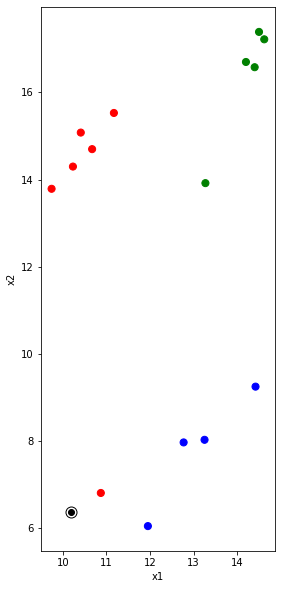

In [2]:
import matplotlib.pyplot as plt

#
# Puntos de interés
#
x1 = 10.18
x2 = 6.38

df.plot.scatter(
    "x1",
    "x2",
    s=50,
    c=df.y.map(lambda w: {"A": "r", "B": "b", "C": "g"}[w]).values,
    figsize=(10, 10),
)
plt.plot([x1], [x2], "o", color="black")
plt.plot([x1], [x2], "o", color="black", fillstyle="none", markersize=11)
plt.gca().set_aspect("equal", "box")

In [3]:
import math

#
# d es la distancia entre (x1, x2) y el cada
# punto del set de datos
#
df["d"] = [math.sqrt((x1 - p1) ** 2 + (x2 - p2) ** 2) for p1, p2 in zip(df.x1, df.x2)]
df.head()

x1     x2  y         d
0  10.67  14.70  A  8.334417
1   9.74  13.79  A  7.423052
2  10.23  14.30  A  7.920158
3  11.17  15.53  A  9.203402
4  10.41  15.08  A  8.703040

In [4]:
#
# Se ordenan los puntos en orden ascendente respecto a d
#
df = df.sort_values(by=['d'], ascending = True)

#
# Si k es, por ejemplo, igual a 8, se toman los
# primeros ocho puntos. La clase 'C' es la mas 
# frecuente y por consiguiente se asigna esa 
# clase al punto x1 = 10.18, x2 = 6.38
#
df.head(8).y.value_counts()

B    4
A    3
C    1
Name: y, dtype: int64

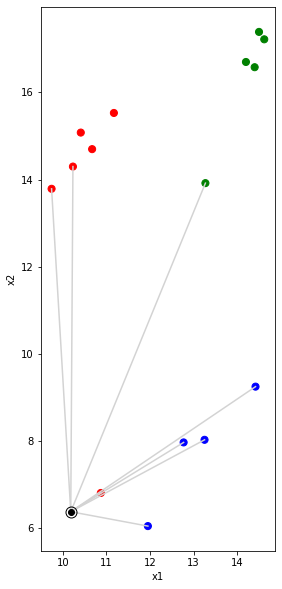

In [5]:
#
# Se grafican los ocho puntos más cercanos
#
df.plot.scatter(
    "x1",
    "x2",
    s=50,
    c=df.y.map(lambda w: {"A": "r", "B": "b", "C": "g"}[w]).values,
    figsize=(10, 10),
)

for p1, p2 in zip(df.head(8).x1, df.head(8).x2):
    plt.plot([x1, p1], [x2, p2], c="lightgray")

plt.plot([x1], [x2], "o", color="black")
plt.plot([x1], [x2], "o", color="black", fillstyle="none", markersize=11)
plt.gca().set_aspect("equal", "box")

**Ejercicio.---** Compute la matriz de distancias entre los puntos de la muestra, y la precisión para $k$ desde 1 hasta 5.

**Ejercicio.---** ¿A que clase se debe asignar el punto $x_1$ = 10.18 y $x_2$ = 6.38, si $k=10$?.

## Cómputo en scikit-learn

In [6]:
import pandas as pd

df = pd.DataFrame(
    {
        "x1": [
            10.67,
            9.74,
            10.23,
            11.17,
            10.41,
            10.87,
            11.95,
            12.77,
            14.42,
            13.25,
            13.27,
            14.40,
            14.50,
            14.20,
            14.62,
        ],
        "x2": [
            14.70,
            13.79,
            14.30,
            15.53,
            15.08,
            6.81,
            6.05,
            7.97,
            9.25,
            8.03,
            13.92,
            16.58,
            17.39,
            16.70,
            17.22,
        ],
        "y": [
            "A",
            "A",
            "A",
            "A",
            "A",
            "A",
            "B",
            "B",
            "B",
            "B",
            "C",
            "C",
            "C",
            "C",
            "C",
        ],
    }
)

df.head()

x1     x2  y
0  10.67  14.70  A
1   9.74  13.79  A
2  10.23  14.30  A
3  11.17  15.53  A
4  10.41  15.08  A

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

X = df[["x1", "x2"]].values
y = df.y.values

knn.fit(X, y)

y_pred = knn.predict(X)

y_pred

array(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'C', 'C',
       'C', 'C'], dtype=object)

In [8]:
pd.DataFrame(y_pred)[0].value_counts()

A    6
B    5
C    4
Name: 0, dtype: int64

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[5, 1, 0],
       [0, 4, 0],
       [1, 0, 4]])

## Métricas de distancia

Existen distintas métricas para computar la distancia entre puntos. 

**Euclidiana.** 

$$ \text{dist}(x_i, x_j) =\left\{ \sum_k (x_{ik} - x_{jk})^2 \right\}^\frac{1}{2}$$

**Manhattan.**

$$ \text{dist}(x_i, x_j) = \sum_k \left|x_{ik} - x_{jk}\right| $$


**Chebychev**.

$$ \text{dist}(x_i, x_j) = \max_k \left|x_{ik} - x_{jk}\right| $$




## Escalamiento y transformación de variables

Al igual que otros algoritmos basados en métricas de distancia, el algoritmo kNN se ve afectado por la escala de las variables. Por ello, se debe realizar la transformación de las variables antes de dicho algoritmo.

**Normalización max-min.** 

$$x_* = \frac{x-\min(x)}{\max(x) - \min(x)}$$

**Estandarización z-score.**

$$z_* = \frac{x-\mu_x}{\sigma_x}$$

* $\mu_x$ es la media de $x$.
* $\sigma_x$ es la desviación estándar de $x$.

**Variables nominales.** Una variable nominal con categorías $C_1$, $C_2$, ..., $C_n$ se codifica con $n-1$ niveles, $L_i$, $i=1,...,n-1$:

$$ L_i =
   \begin{cases}
      1, & \text{if $x \in C_i$.} \\
      0, &\text{En caso contrario.}
   \end{cases}
$$

Si las categorías de una variable $x$ están ordenadas, entonces dicha variable se recodifica como:

$$ L_i =
   \begin{cases}
      i, & \text{if $x \in C_i$.} \\
      0, &\text{En caso contrario.}
   \end{cases}
$$

y luego es realiza la normalización.

## Evaluación del modelo

Para evaluar el desempeño en problemas de clasificación dicotómicos (dos clases mutuamente excluyentes) se usa la siguiente tabla:


             | Pronostico
             |  P     N
    ---------|------------  
          P  |  TP    FN          
    Real     |
          N  |  FP    TN
    
    TP - Verdadero positivo (correcto)
    TN - Verdadero negativo (correcto)
    FN - Falso negativo (mal clasificado)
    FP - Falso positivo (mal clasificado)
    
La medición de la precisión del modelo permite estimar el desempeño del modelo ante nuevos datos.

**Ejercicio.---** Si de la tabla inicial, se separan los dos primeros puntos de cada clase como conjunto de prueba, compute la matriz de confusión para dichos elementos.

A partir de la matriz de confusión es posible calcular diferentes métricas de error.

* Tasa de éxito (porcentaje de patrones clasificados correctamente):


$$\text{success rate} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

* Tasa de error (porcentaje total de patrones clasificados incorrectamente):

$$\text{error rate} = \frac{\text{FP} + \text{FN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} = 1 - \text{accuracy}$$

* Predominio: número total de casos positivos pronósticados respecto al número total de casos.


$$\text{prevalence} = \frac{\text{TP} + \text{FN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

Las siguientes dos métricas representan un balance entre lo conservador y agresivo de un clasificador. Es decir, se podría desear que se clasifique correctamente todas las masas mamarias benignas, pero esto implica que también se clasificarán como benignas masas cancerosas. De forma inversa, se puede desear que se clasifiquen correctamente todas las masas cancerosas, pero esto a su vez implica que algunas masas benignas se clasifiquen como cancerosas. 

* Sensibilidad, tasa verdadera positiva, recall, sensibilidad: mide la proporción de ejemplos positivos que fueron correctamente clasificados.


$$\text{sensitibity} = \frac{\text{TP}}{\text{TP}  + \text{FN}}$$

* Especifidad o tasa verdadera negativa: mide la proporción de ejemplos negativos correctamente clasificados.


$$\text{specifity} = \frac{\text{TN}}{\text{TN}  + \text{FP}}$$

* Precisión o valor predictivo positivo: Proporción de casos positivos que fueron verdaderamente positivos.


$$\text{precision} = \frac{\text{TP}}{\text{TP}  + \text{FP}}$$

* Valor predictivo negativo: Proporción de casos negativos que fueron verdaderamente negativos.


$$\text{negative predictive value} = \frac{\text{TN}}{\text{TN}  + \text{FN}}$$

* La medida F permite comparar varios modelos entre si, combinando la precisión y el recall en una sola medida.


$$\text{F-measure} = \frac{2 * \text{TP}}{2 * \text{TP} + \text{FP} + \text{FN}}$$

**Ejercicio.---** Compute las primeras cuatro métricas de precisión.

**Estadístico Kappa.** Se usa para conjuntos de datos que tienen un fuerte desbalance entre los ejemplos de cada clase; en este caso, se obtiene una alta precisión del clasificador pronosticando siempre que un nueva patrón pertenece a la clase más frecuente. Esta métrica considera la proporción entre los ejemplos de cada clase.

Este estadístico se define como:

$$\kappa = \frac{\text{Pr}(a) - \text{Pr}(e)}{1-\text{Pr}(e)}$$

Donde $\text{Pr}(a)$ es la tasa de éxito:

$$\text{Pr}(a)= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

Y $\text{Pr}(e)$ representa el valor esperado del éxito; es decir, la probabilidad de que se pronostique que un elemento pertenece a una clase, cuando el realmente pertenece.

$$\text{Pr}(e)= \frac{(\text{TP} + \text{FN})
                      (\text{TP} + \text{FP}) + 
                      (\text{FP} + \text{TN})
                      (\text{FN} + \text{TN}) }{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$